# Geoestadística: Análisis multivariable

Los datos utilizados en este ejercicio se obtuvieron de https://mrdata.usgs.gov/geochem/. Revisar el archivo  meuse_dataset_geoest.xlsx para entender mejor el set de datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('datosGeoest.csv')

In [3]:
dataset

,X,Y,cadmium,copper,lead,zinc,elev,ffreq,soil,dist.m
0,181072,333611,11.7,85,299,1022,7.909,1,1,50
1,181025,333558,8.6,81,277,1141,6.983,1,1,30
2,181165,333537,6.5,68,199,640,7.800,1,1,150
3,181298,333484,2.6,81,116,257,7.655,1,2,270
4,181307,333330,2.8,48,117,269,7.480,1,2,380
...,...,...,...,...,...,...,...,...,...,...
150,179184,330182,0.8,20,49,166,8.128,3,1,540
151,179085,330292,3.1,39,173,496,8.577,3,1,520
152,178875,330311,2.1,31,119,342,8.429,3,1,350
153,179466,330381,0.8,21,51,162,9.406,3,1,460


# 1. Boxplots para cada variable

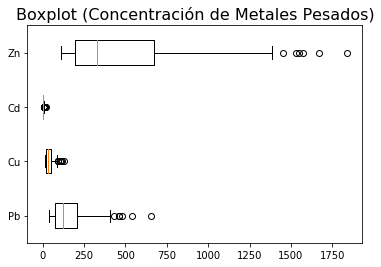

In [4]:
plt.title('Boxplot (Concentración de Metales Pesados)', fontsize=16)
plt.boxplot([dataset['lead'],dataset['copper'],dataset['cadmium'],dataset['zinc']], vert=False)
plt.yticks([1,2,3,4], ['Pb','Cu','Cd','Zn'])
plt.show()

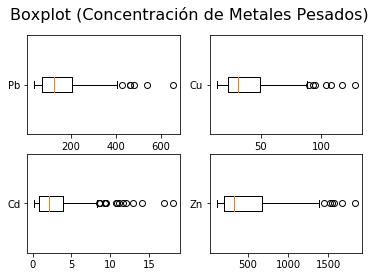

In [5]:
plt.suptitle('Boxplot (Concentración de Metales Pesados)', fontsize=16)
plt.subplot(2,2,1)
plt.boxplot([dataset['lead']], vert=False)
plt.yticks([1], ['Pb'])
plt.subplot(2,2,2)
plt.boxplot([dataset['copper']], vert=False)
plt.yticks([1], ['Cu'])
plt.subplot(2,2,3)
plt.boxplot([dataset['cadmium']], vert=False)
plt.yticks([1], ['Cd'])
plt.subplot(2,2,4)
plt.boxplot([dataset['zinc']], vert=False)
plt.yticks([1], ['Zn'])
plt.show()

# 2. Minimapas mostrando en dónde se encuentra el 10% de los valores más altos 

El 10% de 155 es 15.5, . Se toma el valor de 16 para realizar los minimapas mostrando en dónde se encuentra el 10% de los valores más altos .

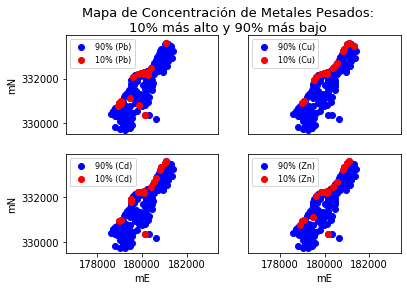

In [6]:
plt.suptitle('Mapa de Concentración de Metales Pesados:\n10% más alto y 90% más bajo', fontsize=13)
plt.subplot(2,2,1)
plt.scatter(dataset['X'],dataset['Y'],color='b')
plt.scatter(dataset.nlargest(16, 'lead')['X'],dataset.nlargest(16, 'lead')['Y'],color='r')
plt.legend( ['90% (Pb)','10% (Pb)'],prop={'size': 8})
plt.xticks([], [])
plt.ylabel('mN')
plt.axis('equal')
plt.subplot(2,2,2)
plt.scatter(dataset['X'],dataset['Y'],color='b')
plt.scatter(dataset.nlargest(16, 'copper')['X'],dataset.nlargest(16, 'copper')['Y'],color='r')
plt.legend( ['90% (Cu)','10% (Cu)'],prop={'size': 8})
plt.yticks([], [])
plt.xticks([], [])
plt.axis('equal')
plt.subplot(2,2,3)
plt.scatter(dataset['X'],dataset['Y'],color='b')
plt.scatter(dataset.nlargest(16, 'cadmium')['X'],dataset.nlargest(16, 'cadmium')['Y'],color='r')
plt.legend( ['90% (Cd)','10% (Cd)'],prop={'size': 8})
plt.axis('equal')
plt.ylabel('mN')
plt.xlabel('mE')
plt.subplot(2,2,4)
plt.scatter(dataset['X'],dataset['Y'],color='b')
plt.scatter(dataset.nlargest(16, 'zinc')['X'],dataset.nlargest(16, 'zinc')['Y'],color='r')
plt.legend( ['90% (Zn)','10% (Zn)'],prop={'size': 8})
plt.yticks([], [])
plt.axis('equal')
plt.xlabel('mE')
plt.show()

# 3. Diagramas de dispersión de concentración de una variable contra todas las demás

In [7]:
def diag_disp(nameSpa,header,element):
    plt.suptitle('Diagramas de Dispersión de Concentración\n'+nameSpa, fontsize=13)
    plt.subplot(2,2,1)
    plt.scatter(dataset[header],dataset['copper'],color='b')
    plt.legend( [('Cu vs '+element)],prop={'size': 8})
    plt.xticks([], [])
    plt.yticks([], [])
    plt.axis('equal')
    plt.subplot(2,2,2)
    plt.scatter(dataset[header],dataset['lead'],color='b')
    plt.legend( [('Pb vs '+element)],prop={'size': 8})
    plt.xticks([], [])
    plt.yticks([], [])
    plt.axis('equal')
    plt.subplot(2,2,3)
    plt.scatter(dataset[header],dataset['cadmium'],color='b')
    plt.legend( [('Cd vs '+element)],prop={'size': 8})
    plt.xticks([], [])
    plt.yticks([], [])
    plt.axis('equal')
    plt.subplot(2,2,4)
    plt.scatter(dataset[header],dataset['zinc'],color='b')
    plt.legend( [('Zn vs '+element)],prop={'size': 8})
    plt.xticks([], [])
    plt.yticks([], [])
    plt.axis('equal')
    plt.show()

### Cobre

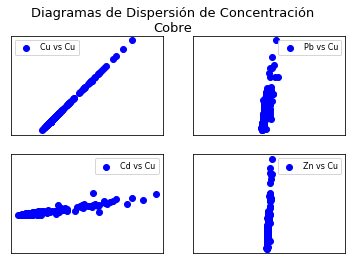

In [8]:
diag_disp('Cobre','copper','Cu')

### Plomo

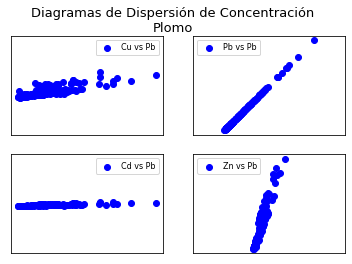

In [9]:
diag_disp('Plomo','lead','Pb')

### Cadmio

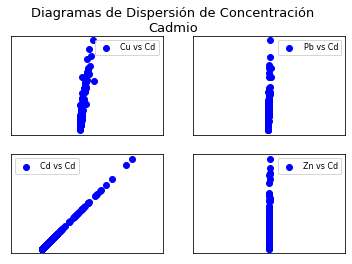

In [10]:
diag_disp('Cadmio','cadmium','Cd')

### Zinc

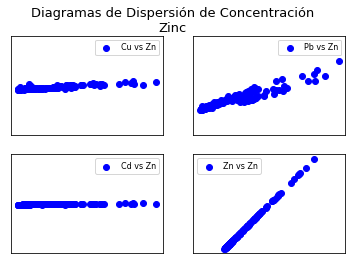

In [11]:
diag_disp('Zinc','zinc','Zn')

### Bonus: Matriz de correlación/covarianza

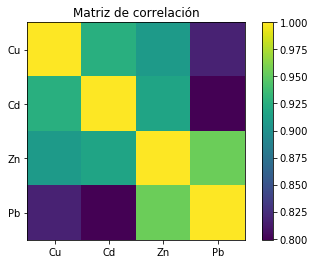

In [12]:
dataset2 = dataset[['copper','cadmium','zinc','lead']]
matCorr = dataset2.corr()
plt.imshow(matCorr)
plt.title('Matriz de correlación')
plt.xticks([0,1,2,3], ['Cu','Cd','Zn','Pb'])
plt.yticks([0,1,2,3], ['Cu','Cd','Zn','Pb'])
plt.colorbar()
plt.show()